In [1]:
import numpy as np
from array import *
import copy
import random
import pandas as pd
import seaborn as sns
from keras.preprocessing.image import ImageDataGenerator
import tensorflow as tf
import matplotlib.pyplot as plt
import cv2
tf.__version__

'2.3.1'

In [2]:
data = pd.read_csv('HAM10000_metadata.csv')

In [3]:
data.head(5)

,lesion_id,image_id,dx,dx_type,age,sex,localization
0,HAM_0000118,ISIC_0027419,bkl,histo,80.0,male,scalp
1,HAM_0000118,ISIC_0025030,bkl,histo,80.0,male,scalp
2,HAM_0002730,ISIC_0026769,bkl,histo,80.0,male,scalp
3,HAM_0002730,ISIC_0025661,bkl,histo,80.0,male,scalp
4,HAM_0001466,ISIC_0031633,bkl,histo,75.0,male,ear


In [4]:
data['image_id'] = data['image_id'].apply(lambda x:('HAM10000_images/' + x +'.jpg'))

In [5]:
data.head(5)

,lesion_id,image_id,dx,dx_type,age,sex,localization
0,HAM_0000118,HAM10000_images/ISIC_0027419.jpg,bkl,histo,80.0,male,scalp
1,HAM_0000118,HAM10000_images/ISIC_0025030.jpg,bkl,histo,80.0,male,scalp
2,HAM_0002730,HAM10000_images/ISIC_0026769.jpg,bkl,histo,80.0,male,scalp
3,HAM_0002730,HAM10000_images/ISIC_0025661.jpg,bkl,histo,80.0,male,scalp
4,HAM_0001466,HAM10000_images/ISIC_0031633.jpg,bkl,histo,75.0,male,ear


In [6]:
labels = data.iloc[:, 2:3].values

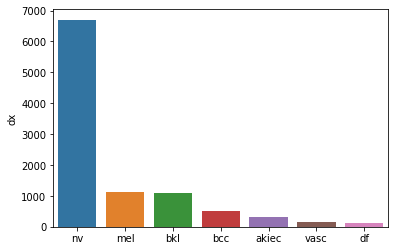

In [7]:
sns.barplot(x = data['dx'].value_counts().index, y = data['dx'].value_counts())

In [8]:
classes, counts = np.unique(labels, return_counts=True)

In [9]:
counts

array([ 327,  514, 1099,  115, 1113, 6705,  142], dtype=int64)

In [10]:
classes

array(['akiec', 'bcc', 'bkl', 'df', 'mel', 'nv', 'vasc'], dtype=object)

Text(0, 0.5, 'Number Of Samples')

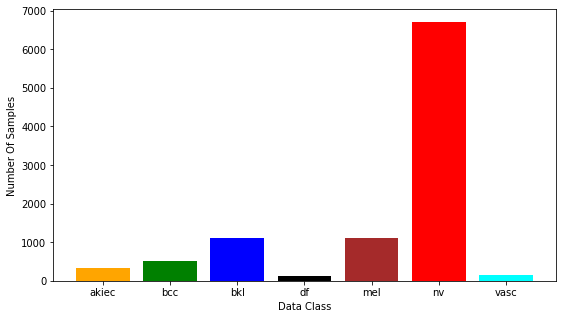

In [11]:
classes, counts = np.unique(labels, return_counts=True)
plt.figure(figsize=(9, 5))
plt.bar(classes, counts, 
        tick_label=[classes[0], classes[1], classes[2],
                    classes[3], classes[4], classes[5],
                    classes[6]],
       color = ['orange', 'green', 'blue', 'black', 'brown', 'red','cyan'])
plt.xlabel('Data Class')
plt.ylabel('Number Of Samples')

(-0.5, 95.5, 95.5, -0.5)

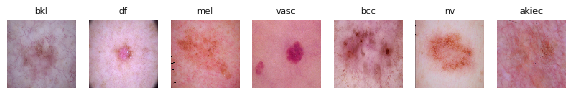

In [12]:
w_grid = 1
l_grid = 7
fig, axes = plt.subplots(w_grid, l_grid, figsize = (10, 6))
axes = axes.ravel()
axes[0].imshow(cv2.resize(plt.imread('data/' + data['image_id'][501]), (96, 96), interpolation = cv2.INTER_NEAREST))
axes[0].set_title(data['dx'][501], fontsize = 9)
axes[0].axis('off')
axes[1].imshow(cv2.resize(plt.imread('data/' + data['image_id'][1101]), (96, 96), interpolation = cv2.INTER_NEAREST))
axes[1].set_title(data['dx'][1101], fontsize = 9)
axes[1].axis('off')
axes[2].imshow(cv2.resize(plt.imread('data/' + data['image_id'][2221]), (96, 96), interpolation = cv2.INTER_NEAREST))
axes[2].set_title(data['dx'][2221], fontsize = 9)
axes[2].axis('off')
axes[3].imshow(cv2.resize(plt.imread('data/' + data['image_id'][2427]), (96, 96), interpolation = cv2.INTER_NEAREST))
axes[3].set_title(data['dx'][2427], fontsize = 9)
axes[3].axis('off')
axes[4].imshow(cv2.resize(plt.imread('data/' + data['image_id'][2707]), (96, 96), interpolation = cv2.INTER_NEAREST))
axes[4].set_title(data['dx'][2707], fontsize = 9)
axes[4].axis('off')
axes[5].imshow(cv2.resize(plt.imread('data/' + data['image_id'][8825]), (96, 96), interpolation = cv2.INTER_NEAREST))
axes[5].set_title(data['dx'][8825], fontsize = 9)
axes[5].axis('off')
axes[6].imshow(cv2.resize(plt.imread('data/' + data['image_id'][9783]), (96, 96), interpolation = cv2.INTER_NEAREST))
axes[6].set_title(data['dx'][9783], fontsize = 9)
axes[6].axis('off')

In [13]:
dataset = pd.read_csv('skin_cancer_data1.csv', low_memory = False)
dataset_nv = pd.read_csv('skin_cancer_data2.csv', low_memory=False)

In [14]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3310 entries, 0 to 3309
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  3310 non-null   int64 
 1   image       3310 non-null   object
 2   label       3310 non-null   object
dtypes: int64(1), object(2)
memory usage: 77.7+ KB


In [15]:
dataset = dataset.drop(labels='Unnamed: 0', axis=1)
dataset_nv = dataset_nv.drop(labels='Unnamed: 0', axis=1)

In [16]:
dataset['label'].value_counts()

mel      1113
bkl      1099
bcc       514
akiec     327
vasc      142
df        115
Name: label, dtype: int64

In [17]:
dataset_nv['label'].value_counts()

nv    6705
Name: label, dtype: int64

In [18]:
data = dataset.sample(frac = 1)

In [19]:
data['image'] = data['image'].apply(lambda x:(np.fromstring(x, dtype = int, sep = ' ')).reshape(96, 96, 3))
dataset_nv['image'] = dataset_nv['image'].apply(lambda x:(np.fromstring(x, dtype = int, sep = ' ')).reshape(96, 96, 3))

In [20]:
data_clockwise_90 = copy.copy(data)
data_clockwise_90['image'] = data_clockwise_90['image'].apply(lambda x: (cv2.rotate(x, cv2.cv2.ROTATE_90_CLOCKWISE)))

data_round_180 = copy.copy(data)
data_round_180['image'] = data_round_180['image'].apply(lambda x: (cv2.rotate(x, cv2.cv2.ROTATE_180)))

data_flip_ud = copy.copy(data)
data_flip_ud['image'] = data_flip_ud['image'].apply(lambda x: (cv2.flip(x, 0)))

data_flip_lr = copy.copy(data)
data_flip_lr['image'] = data_flip_lr['image'].apply(lambda x: (cv2.flip(x, 1)))

data_counterclockwise_90 = copy.copy(data)
data_counterclockwise_90['image'] = data_counterclockwise_90['image'].apply(lambda x: (
    cv2.rotate(x, cv2.cv2.ROTATE_90_COUNTERCLOCKWISE)))

(-0.5, 95.5, 95.5, -0.5)

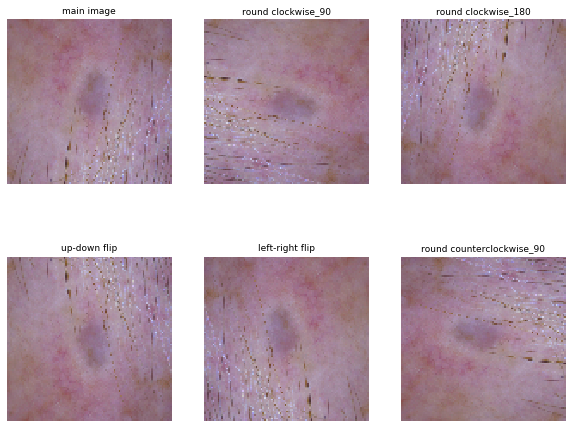

In [21]:
w_grid = 2
l_grid = 3
fig, axes = plt.subplots(w_grid, l_grid, figsize = (10, 8))
axes = axes.ravel()
j = np.random.randint(0, len(data))
axes[0].imshow(data['image'][j])
axes[0].set_title('main image', fontsize = 9)
axes[0].axis('off')
axes[1].imshow(data_clockwise_90['image'][j])
axes[1].set_title('round clockwise_90', fontsize = 9)
axes[1].axis('off')
axes[2].imshow(data_round_180['image'][j])
axes[2].set_title('round clockwise_180', fontsize = 9)
axes[2].axis('off')
axes[3].imshow(data_flip_ud['image'][j])
axes[3].set_title('up-down flip', fontsize = 9)
axes[3].axis('off')
axes[4].imshow(data_flip_lr['image'][j])
axes[4].set_title('left-right flip', fontsize = 9)
axes[4].axis('off')
axes[5].imshow(data_counterclockwise_90['image'][j])
axes[5].set_title('round counterclockwise_90', fontsize = 9)
axes[5].axis('off')